In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

In [2]:
#retrieving data
Data = pd.read_csv("C:\\Users\\91978\\Desktop\\important\\supermarket_sales.csv")
Data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
Data['Date'] = pd.to_datetime(Data['Date'])
Data['year'] = Data['Date'].dt.year

# Sales data categorized by year
yearly_sales = Data.groupby('year')['Total'].sum()
print(yearly_sales)

year
2019    322966.749
Name: Total, dtype: float64


In [4]:
#Sales data categorized by month
Data['month'] = Data['Date'].dt.month
monthly_sales = Data.groupby('month')['Total'].sum()
print(monthly_sales)

month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64


In [5]:
#Sales data categorized by gender
sales_by_gender = Data.groupby('Gender')['Total'].sum()
print(sales_by_gender)

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64


In [6]:
#Sales data categorized by city
sales_by_city = Data.groupby('City')['Total'].sum()
print(sales_by_city)

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64


In [7]:
#Sales data categorized by payment type
sales_by_payment = Data.groupby('Payment')['Total'].sum()
print(sales_by_payment)

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64


In [8]:
#Sales data categorized by product line, including gross income
sales_by_productline = Data.groupby('Product line')['gross income'].sum()
print(sales_by_productline)

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64


In [26]:
#Trend analysis of sales over time


analysis_sales = Data.groupby('month')['Total'].sum()
print(monthly_sales)


month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64


In [10]:
#Average ratings for each product line.
Average_rating_product_line = Data.groupby('Product line')['Rating'].mean()
print(Average_rating_product_line)

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


Total Sales Data Categorized by Year:
Year 2019: $322,966.75


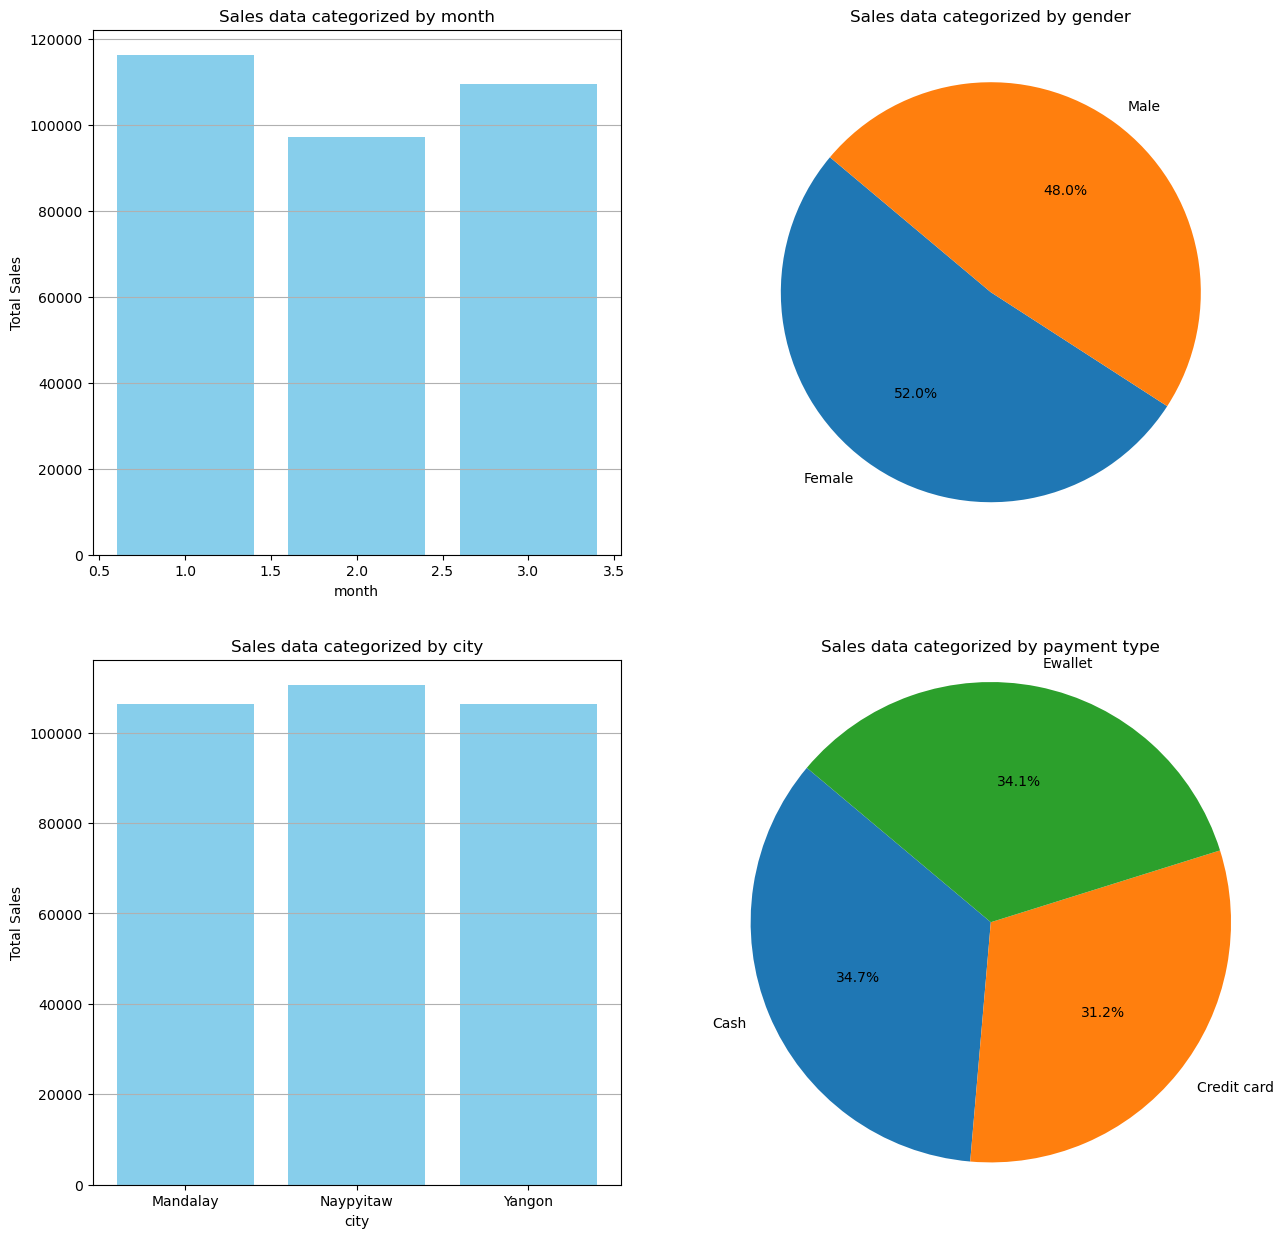

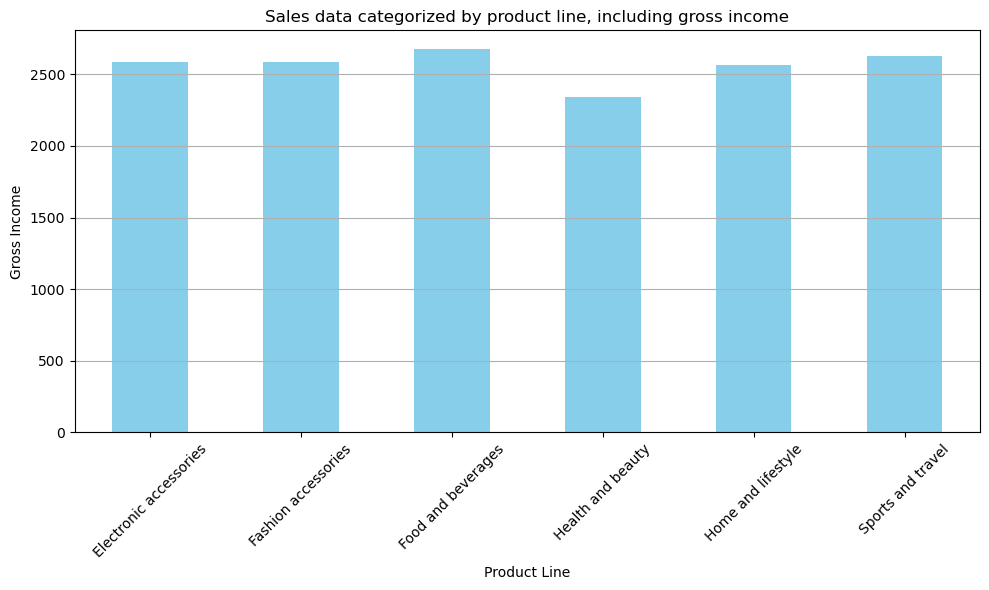

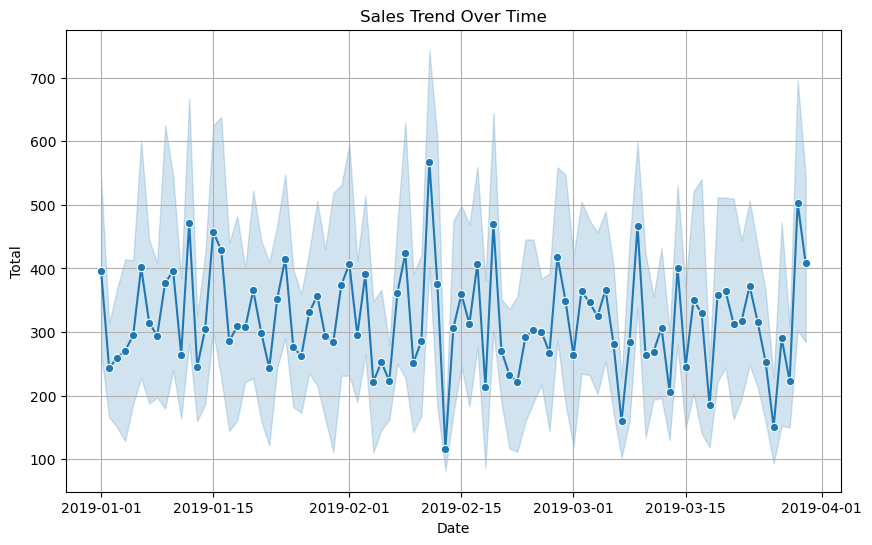

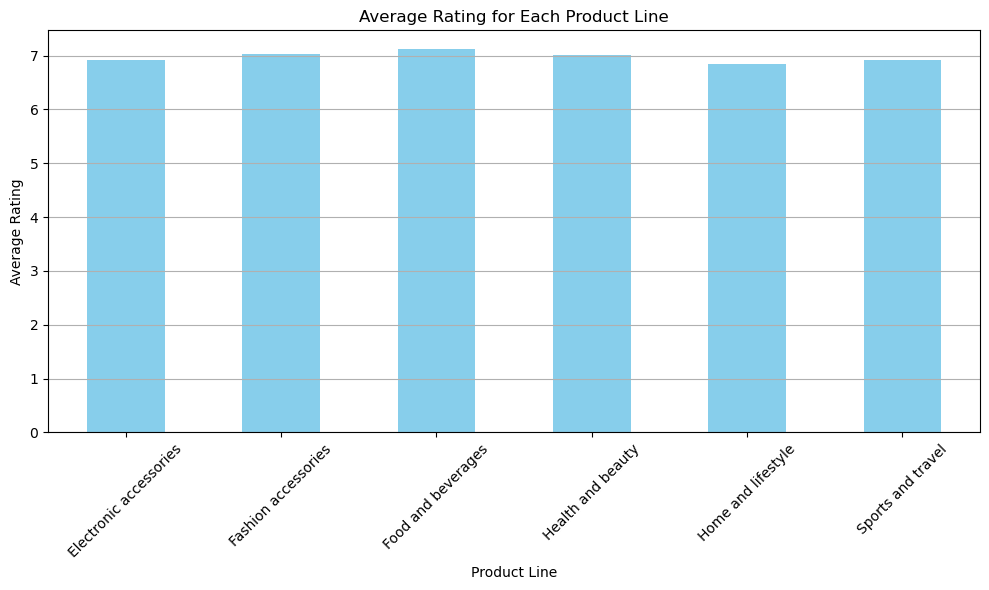

In [44]:
# Plot 1: Sales data categorized by year
print("\033[1m\033[31mTotal Sales Data Categorized by Year:\033[10m") 
for year, sales in yearly_sales.items():
    print(f"\033[34mYear {year}:\033[0m \033[32m${sales:,.2f}\033[0m")

# Create subplots for the dashboard
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))


#Plot2: Sales data categorized by month
axs[0, 0].bar(monthly_sales.index, monthly_sales.values, color='skyblue')
axs[0, 0].set_title('Sales data categorized by month')
axs[0, 0].set_xlabel('month')
axs[0, 0].set_ylabel('Total Sales')
axs[0, 0].grid(axis='y')

#Plot3:Sales data categorized by gender
axs[0, 1].pie(sales_by_gender.values, labels=sales_by_gender.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Sales data categorized by gender')
plt.axis('equal')


#Plot4: Sales data categorized by city
axs[1, 0].bar(sales_by_city.index, sales_by_city.values, color='skyblue')
axs[1, 0].set_title('Sales data categorized by city')
axs[1, 0].set_xlabel('city')
axs[1, 0].set_ylabel('Total Sales')
axs[1, 0].grid(axis='y')

#plot5: Sales data categorized by payment type
axs[1, 1].pie(sales_by_payment.values, labels=sales_by_payment.index, autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Sales data categorized by payment type')
plt.axis('equal')

#plot6:Sales data categorized by product line, including gross income
plt.figure(figsize=(10, 6))
sales_by_productline.plot(kind='bar', color='skyblue')
plt.title('Sales data categorized by product line, including gross income')
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#plot7 L: Trend analysis of sales over time
Data['Date'] = pd.to_datetime(Data['Date'])
plt.figure(figsize=(10, 6))
sns.lineplot(data=Data, x='Date', y='Total', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total')
plt.grid(True)
plt.show()
warnings.simplefilter(action='ignore', category=FutureWarning)


#plot8: Average ratings for each product line.


plt.figure(figsize=(10, 6))
Average_rating_product_line.plot(kind='bar', color='skyblue')
plt.title('Average Rating for Each Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()




